In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\psagv\\Downloads\\IRIS Flower.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Text(0.5, 0, 'species')

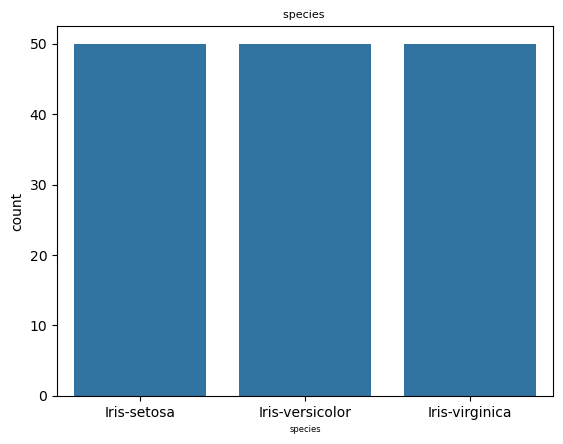

In [7]:
sns.countplot(x=df['species'])
plt.title('species ' , size = 8)
plt.xlabel('species',size = 6)

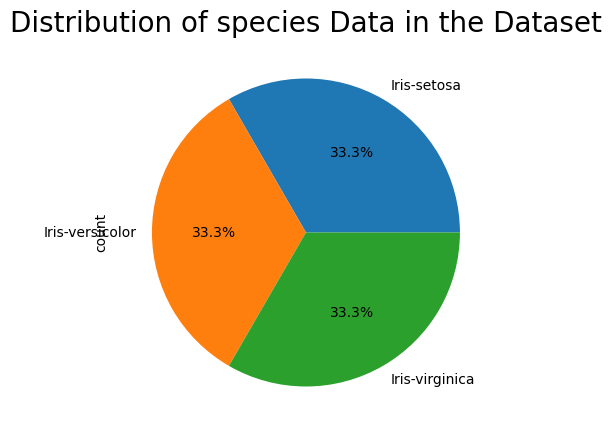

In [8]:
df["species"].value_counts().plot.pie(figsize=(8,5),autopct="%1.1f%%")
plt.title("Distribution of species Data in the Dataset",fontsize=20)
plt.show()

In [9]:
# Separate the features (X) and target (y)
X = df.drop(columns=['species'])  # Dropping the 'species' column as it is the target
y = df['species']  # The target variable is 'species'

In [10]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardize the feature set
scaler = StandardScaler()

# Fit on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

# Train the model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [13]:
# Predict the species for the test set
y_pred = log_reg.predict(X_test_scaled)

In [14]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

LR_Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


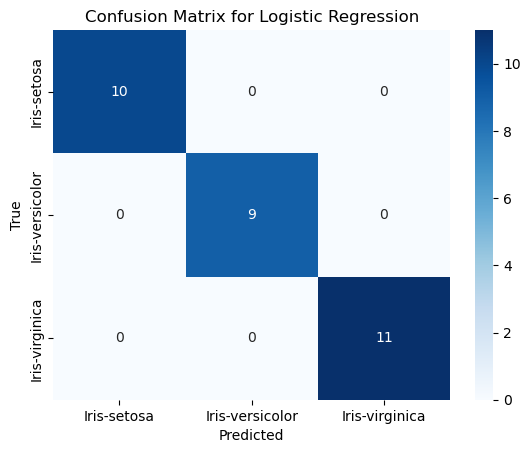

In [15]:
# Evaluate the model's accuracy
LR_Accuracy = accuracy_score(y_test, y_pred)
print(f"LR_Accuracy: {LR_Accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,recall_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')

In [17]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred_NB = NB.predict(X_test)
NB_accuracy = accuracy_score(y_test,y_pred_NB)
print(NB_accuracy*100,'%')

CM = confusion_matrix(y_test, y_pred_NB)
print("\nConfusion Matrix: \n", CM)

100.0 %

Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [18]:
print(classification_report(y_test, y_pred_NB))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



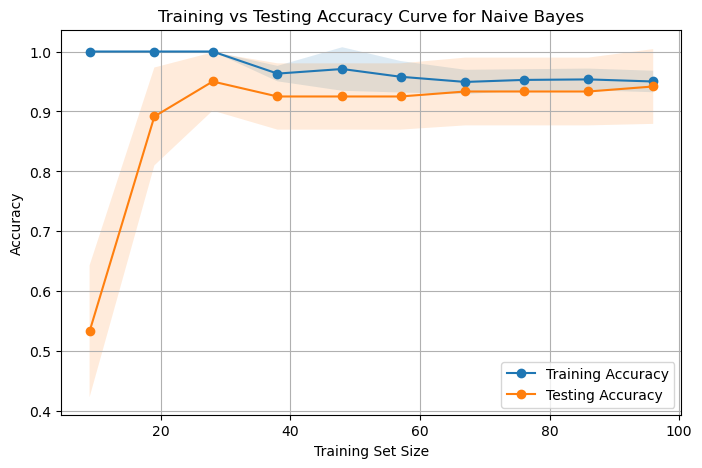

In [19]:
from sklearn.model_selection import learning_curve
NB.fit(X_train, y_train)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(NB, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Training vs Testing Accuracy Curve for Naive Bayes')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [20]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
print(DTC.feature_importances_)
print(X_train.columns)

[0.         0.01667014 0.90614339 0.07718647]
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [22]:
y_pred_DTC = DTC.predict(X_test)
DTC_Accuracy = accuracy_score(y_test, y_pred_DTC)
print(DTC_Accuracy*100,'%')

100.0 %


In [23]:
CM = confusion_matrix(y_test, y_pred_DTC)
print(CM)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [24]:
print(classification_report(y_test, y_pred_DTC))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



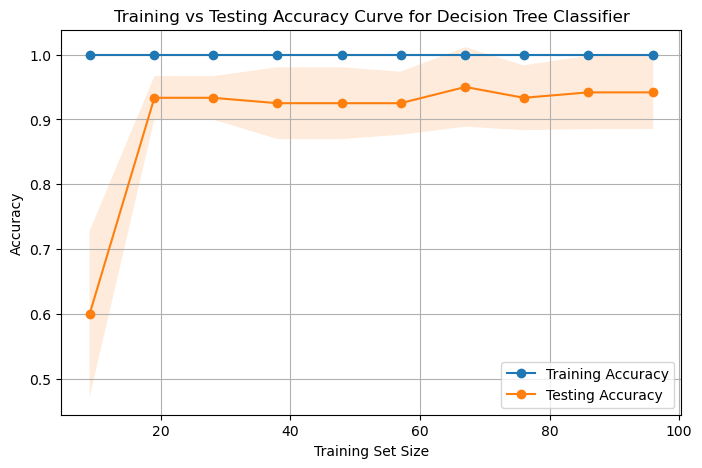

In [25]:
from sklearn.model_selection import learning_curve
DTC.fit(X_train, y_train)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(DTC, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Training vs Testing Accuracy Curve for Decision Tree Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [26]:
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train,y_train)
y_Res_KNN=KNN_clf.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, y_Res_KNN)
print(KNN_Accuracy*100,'%')

100.0 %


In [27]:
CM = confusion_matrix(y_test, y_Res_KNN)
print(CM)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [28]:
print(classification_report(y_test, y_Res_KNN))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



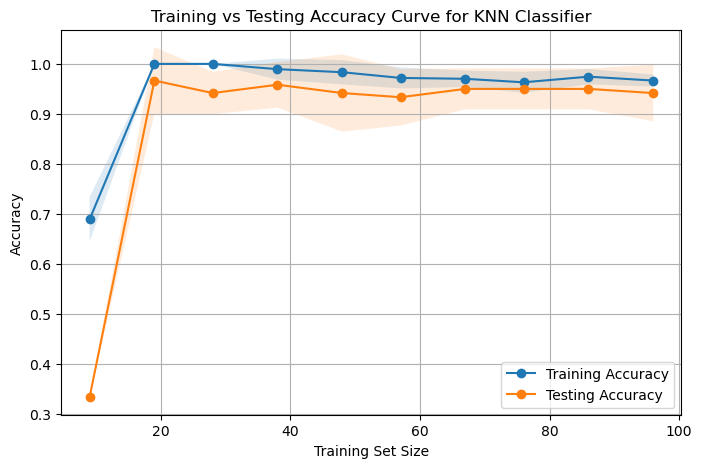

In [29]:
from sklearn.model_selection import learning_curve
KNN_clf.fit(X_train, y_train)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(KNN_clf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Training vs Testing Accuracy Curve for KNN Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [30]:
ADC = AdaBoostClassifier()
ADC.fit(X_train,y_train)
y_pred_ADC = ADC.predict(X_test)
ADC_Accuracy = accuracy_score(y_test,y_pred_ADC)
print(ADC_Accuracy*100,"%")

100.0 %


In [31]:
CM = confusion_matrix(y_test, y_pred_ADC)
print(CM)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [32]:
print(classification_report(y_test, y_pred_ADC))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



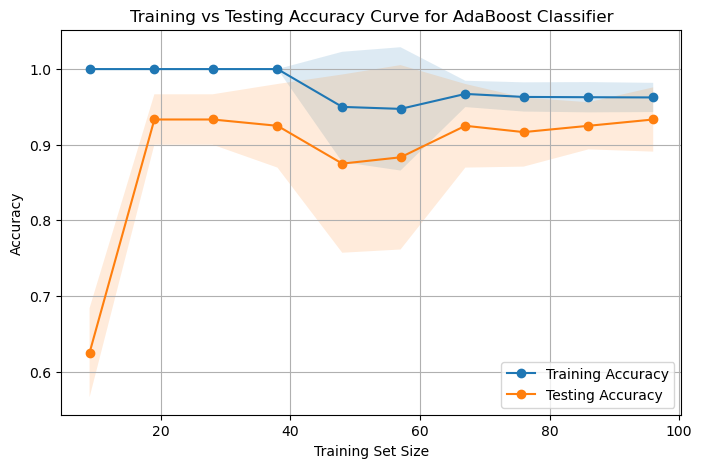

In [33]:
from sklearn.model_selection import learning_curve
ADC.fit(X_train, y_train)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(ADC, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Training vs Testing Accuracy Curve for AdaBoost Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [34]:
print("Logistic_Regression = ",round(LR_Accuracy*100,2))
print("Naive Bayes = ",round(NB_accuracy*100,2))
print("Decision_tree =",round(DTC_Accuracy*100,2))
print("K Nearest Neighbor =",round(KNN_Accuracy*100,2))
print("AdaBoost = ",round(ADC_Accuracy*100,2))

Logistic_Regression =  100.0
Naive Bayes =  100.0
Decision_tree = 100.0
K Nearest Neighbor = 100.0
AdaBoost =  100.0
